Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('iris.xls')

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Null values spotted

In [ ]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
data.isna().sum().sum()

19

<AxesSubplot:xlabel='SL', ylabel='SW'>

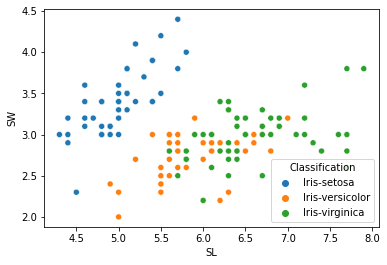

In [ ]:
sns.scatterplot(x = "SL" , y = "SW" , hue = "Classification" , data = data)

In [ ]:
#filling nulllvalue with previous value

In [ ]:
df6=data.fillna(method='pad') 

In [ ]:
df6

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.0,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Encoding Target classes to Numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df6['Classification']=le.fit_transform(df6['Classification'])

In [ ]:
df6

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.9,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.0,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df6['Classification'].unique()

array([0, 1, 2])

In [ ]:
df6.groupby(by="Classification").agg(["mean" , "min" , "max"])

SL               SW               PL               PW       \
                 mean  min  max   mean  min  max   mean  min  max   mean  min   
Classification                                                                  
0               5.002  4.3  5.8  3.398  2.3  4.4  1.466  1.0  1.9  0.244  0.1   
1               5.936  4.9  7.0  2.784  2.0  3.4  4.238  3.0  5.1  1.326  1.0   
2               6.638  5.6  7.9  2.962  2.2  3.8  5.542  4.5  6.9  2.026  1.4   

                     
                max  
Classification       
0               0.6  
1               1.8  
2               2.5

In [ ]:
#correlation heatmap

<AxesSubplot:>

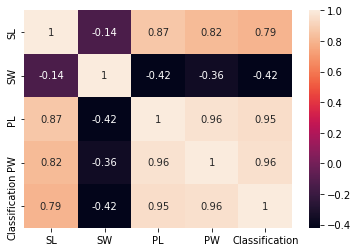

In [ ]:
sns.heatmap(df6.corr(), annot = True)

In [ ]:
#spotting outliers with boxplot

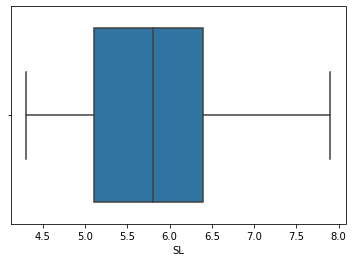

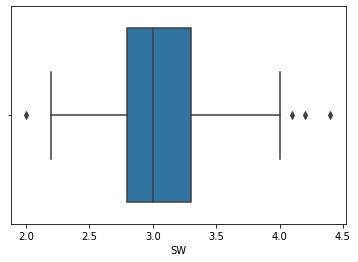

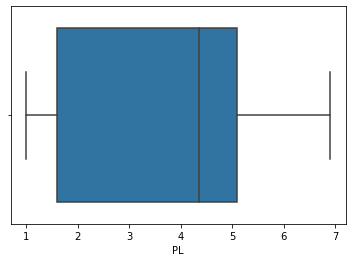

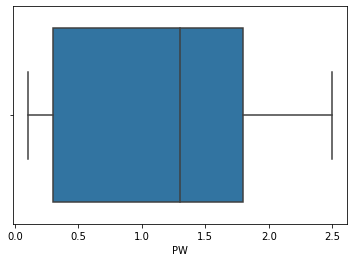

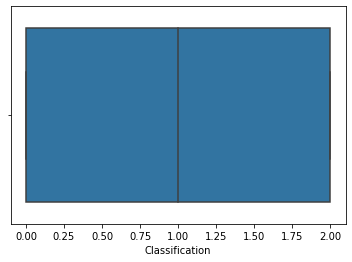

In [ ]:
for i in df6:
    sns.boxplot(x=df6[i])
    plt.show()

In [ ]:
from scipy import stats
IQR=stats.iqr(df6.SW,interpolation='midpoint')
IQR

0.5

In [ ]:
Q1=df6.SW.quantile(0.25)
Q3=df6.SW.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.05, 4.05)

In [ ]:
df6.loc[df6.SW>max_limit]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [ ]:
df6.loc[df6.SW<min_limit]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,1


In [ ]:
#removing outliers in SW with meadian value

In [ ]:
df6.loc[df6['SW']>max_limit,'SW']=np.median(df6.SW)

In [ ]:
df6.loc[df6.SW>max_limit]

,SL,SW,PL,PW,Classification


In [ ]:
df6.loc[df6['SW']<min_limit,'SW']=np.median(df6.SW)

In [ ]:
df6.loc[df6.SW<min_limit]

,SL,SW,PL,PW,Classification


In [ ]:
#Assigning Target and Predictors

In [ ]:
y=df6['Classification']
x=df6.drop(['Classification'],axis=1)

In [ ]:
#Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#Classification with LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=1000)
model=clf.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
#Metrics of model

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred,average='micro'))
print('Recall=',recall_score(y_test,y_pred,average='micro'))
print('F1 score=',f1_score(y_test,y_pred,average='micro'))

Accuracy= 0.9666666666666667
Precision= 0.9666666666666667
Recall= 0.9666666666666667
F1 score= 0.9666666666666667


In [ ]:
print(y_pred)

[2 0 1 0 0 1 2 2 0 0 1 2 0 1 2 1 0 1 0 2 1 0 0 1 2 2 0 2 1 1]


In [ ]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]])

In [ ]:
#kNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  model=classifier.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [ ]:
metric_k

[0.9666666666666667,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.8666666666666667,
 0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

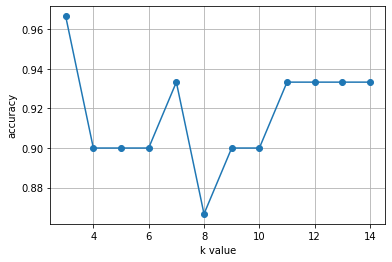

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
#k highest at 3

In [ ]:
classifier =KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
model=classifier.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred,average='weighted'))
print('Recall=',recall_score(y_test,y_pred,average='weighted'))
print('F1 score=',f1_score(y_test,y_pred,average='weighted'))

Accuracy= 0.9666666666666667
Precision= 0.9700000000000001
Recall= 0.9666666666666667
F1 score= 0.9666666666666667


In [ ]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]])

In [ ]:
#SVM model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear') #rbf,poly 
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_predsvm=svmclf.predict(x_test)

In [ ]:
y_predsvm

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print('accuracy=',accuracy_score(y_test,y_predsvm))

accuracy= 1.0


In [ ]:
print(confusion_matrix(y_test,y_predsvm))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [ ]:
#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_clf=DecisionTreeClassifier()
df_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_preddt=df_clf.predict(x_test)

In [ ]:
print('accuracy=',accuracy_score(y_test,y_preddt))

accuracy= 1.0


In [ ]:
print(confusion_matrix(y_test,y_preddt))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predrf=rf_clf.predict(x_test)

In [ ]:
print('accuracy=',accuracy_score(y_test,y_predrf))

accuracy= 0.9666666666666667


In [ ]:
print(confusion_matrix(y_test,y_predrf))

[[12  0  0]
 [ 0  5  0]
 [ 0  1 12]]


In [ ]:
#Predicting for random value

In [ ]:
y_pred_rf=rf_clf.predict([[6,3.6,6,2]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_rf

array([2])

Inference
Logistic Regression,kNN, Random Forest models show 96% accuracy
whereas SVM and Decision Tree models give 100% accuracy.
So, Decision Tree and SVM models give the best result